In [6]:
# basic plotting imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting

import mne
from mne import io
 
import numpy as np

from neurodsp import filt

from bycycle.features import compute_features
from bycycle.plts import plot_burst_detect_summary, plot_feature_categorical

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})


Opening raw-browser...


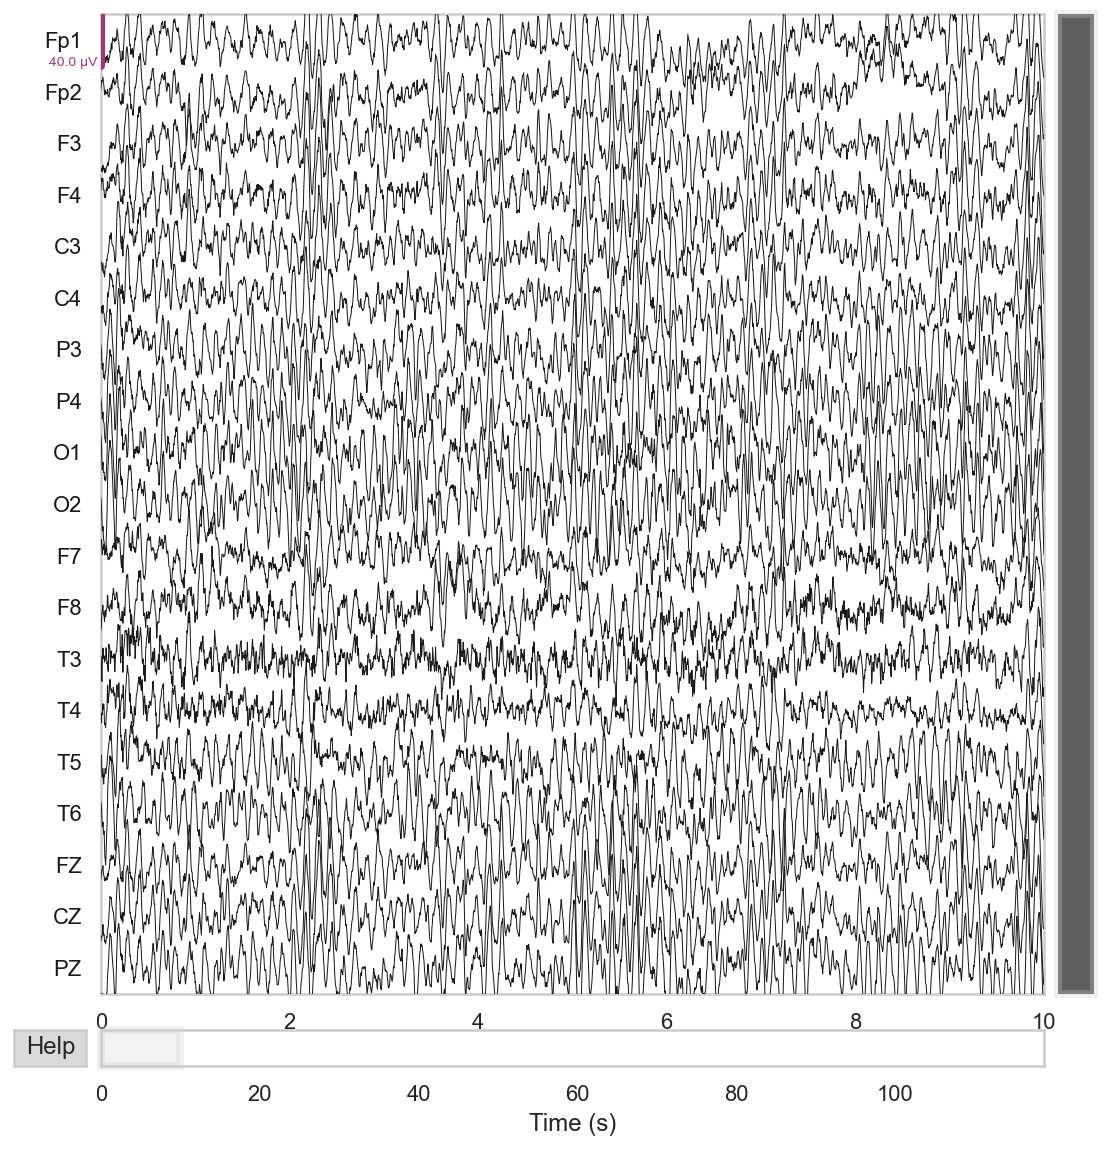

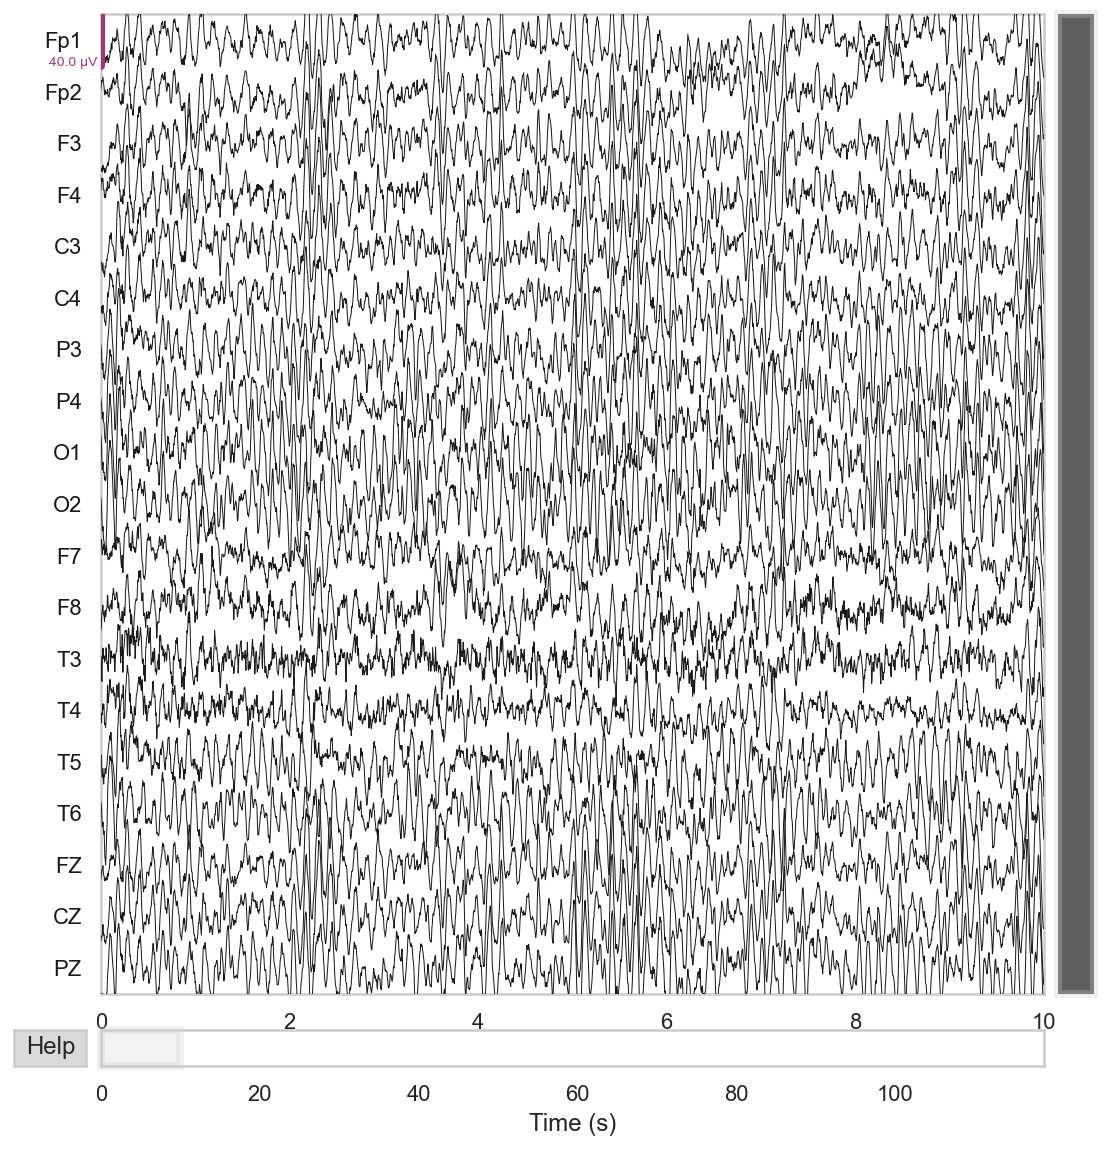

In [7]:
# import the eyes closed data, and plot
eyes_closed = io.read_raw_eeglab('data/eeg/MichaelECxdf.set', preload=True)
mne.viz.plot_raw(eyes_closed)


In [8]:
fs = eyes_closed.info['sfreq'] # sampling rate from mne structure

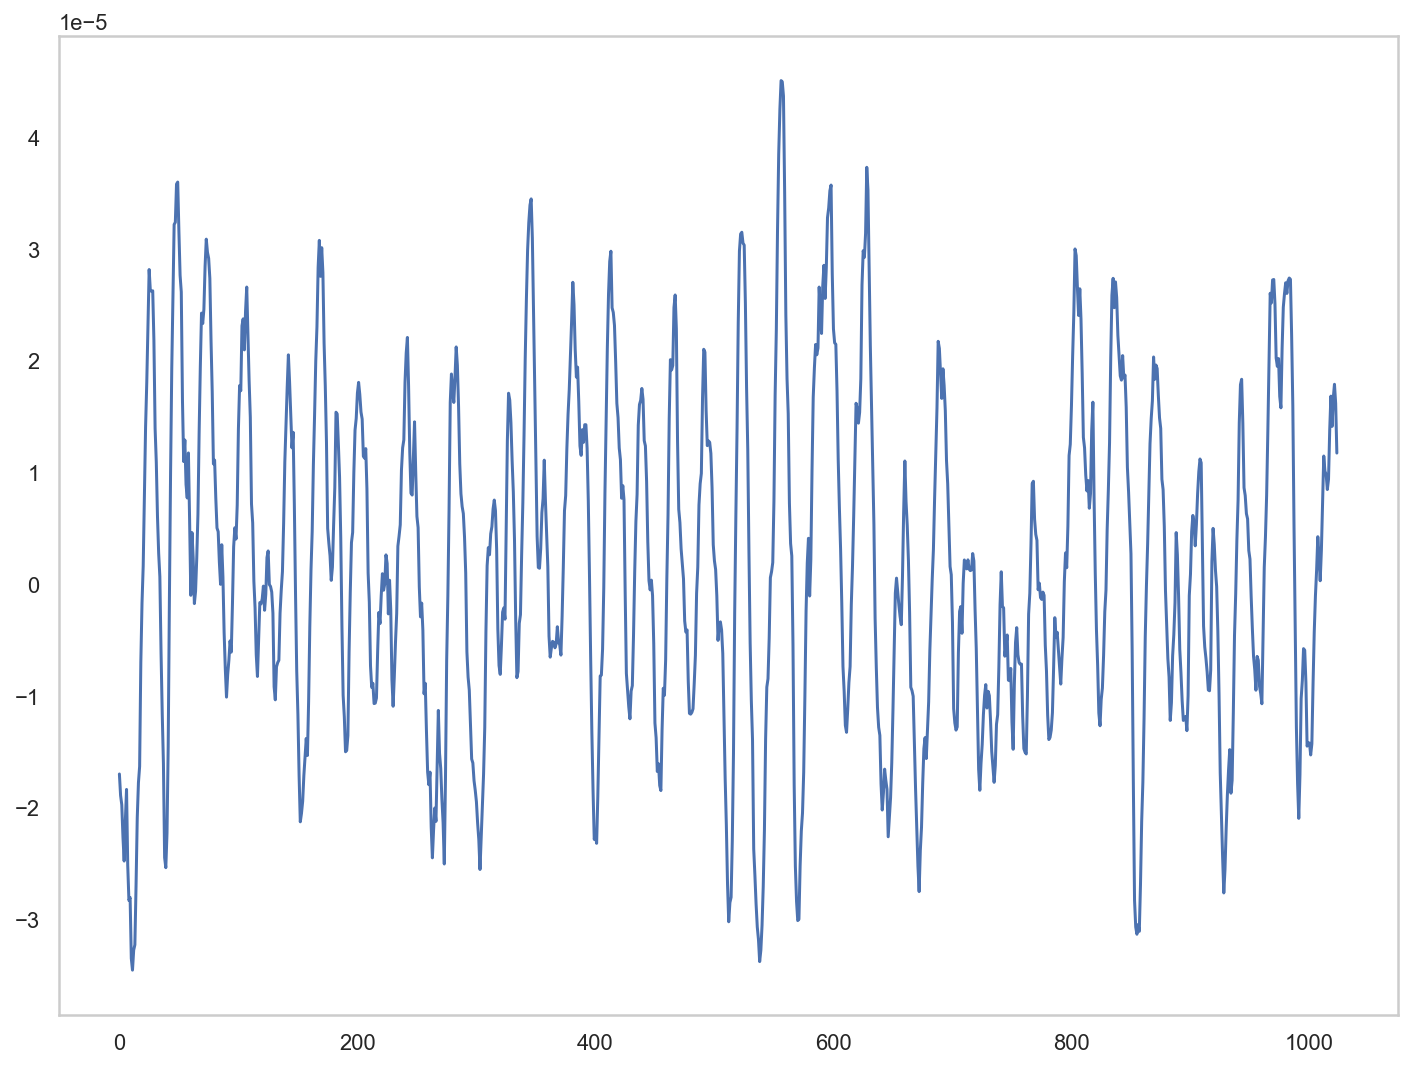

In [9]:
# extract the raw data array from the mne structure

data_array = eyes_closed.get_data()

chan_idx = 18 # Pz
pz = data_array[chan_idx, :] # let's just look at channel Cz

plt.plot(pz[0:1024])
plt.show()

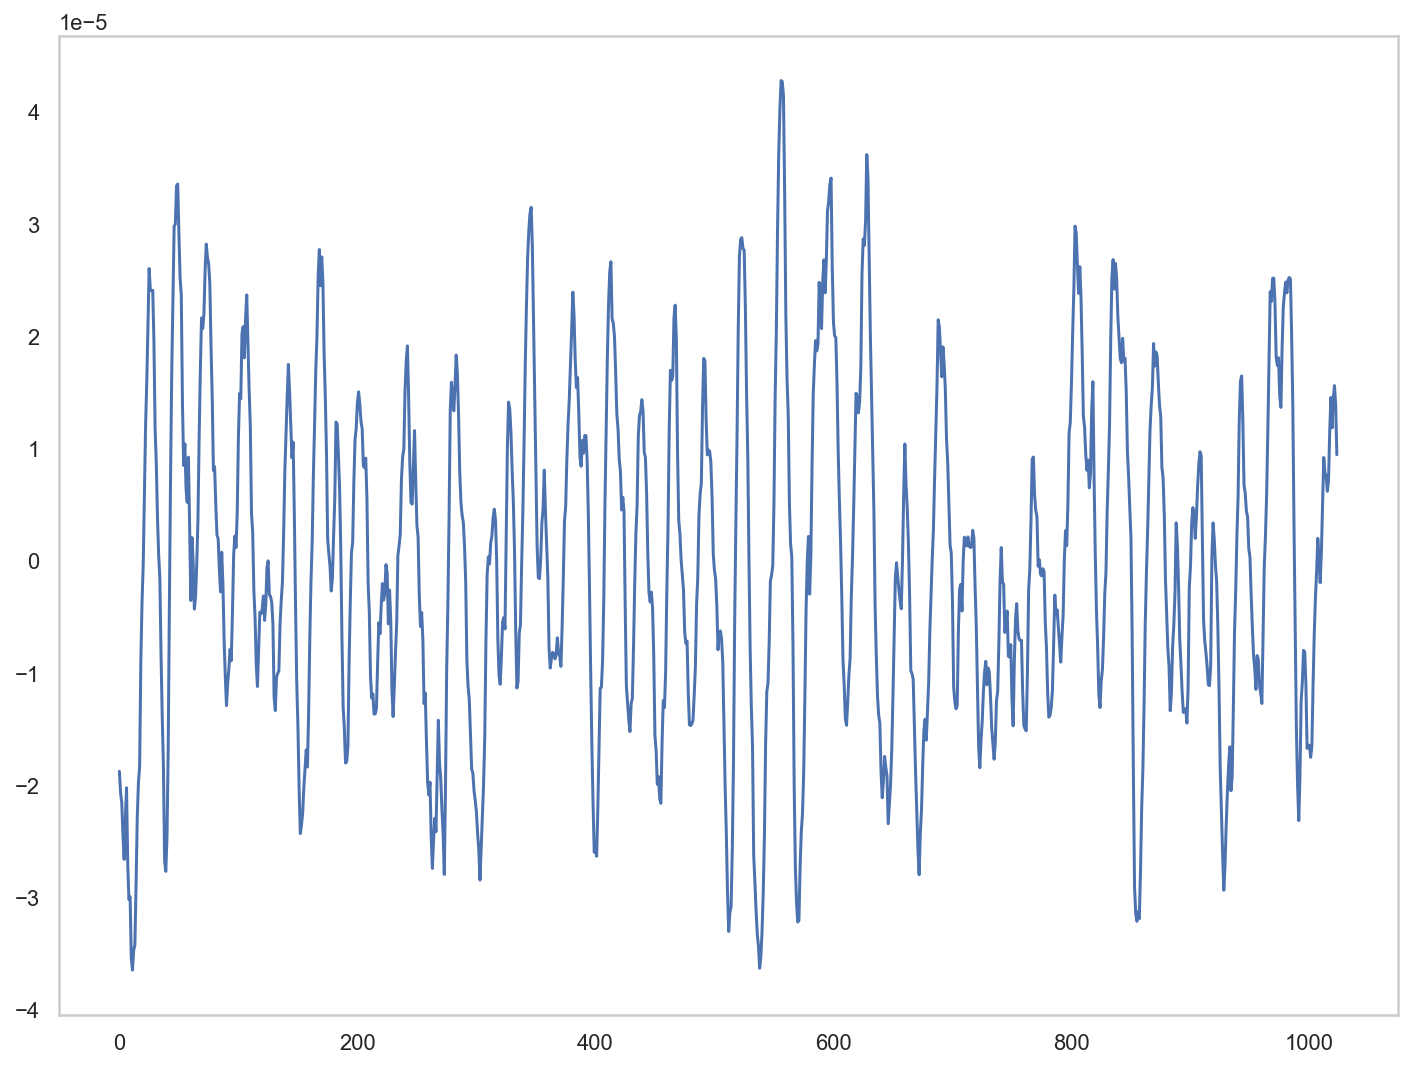

In [10]:
# highpass filter Pz
pz_filt = filt.filter_signal(pz, fs=fs, pass_type='highpass',
                filter_type='fir', f_range=0.5, remove_edges=False)

plt.plot(pz_filt[0:1024])
plt.show()

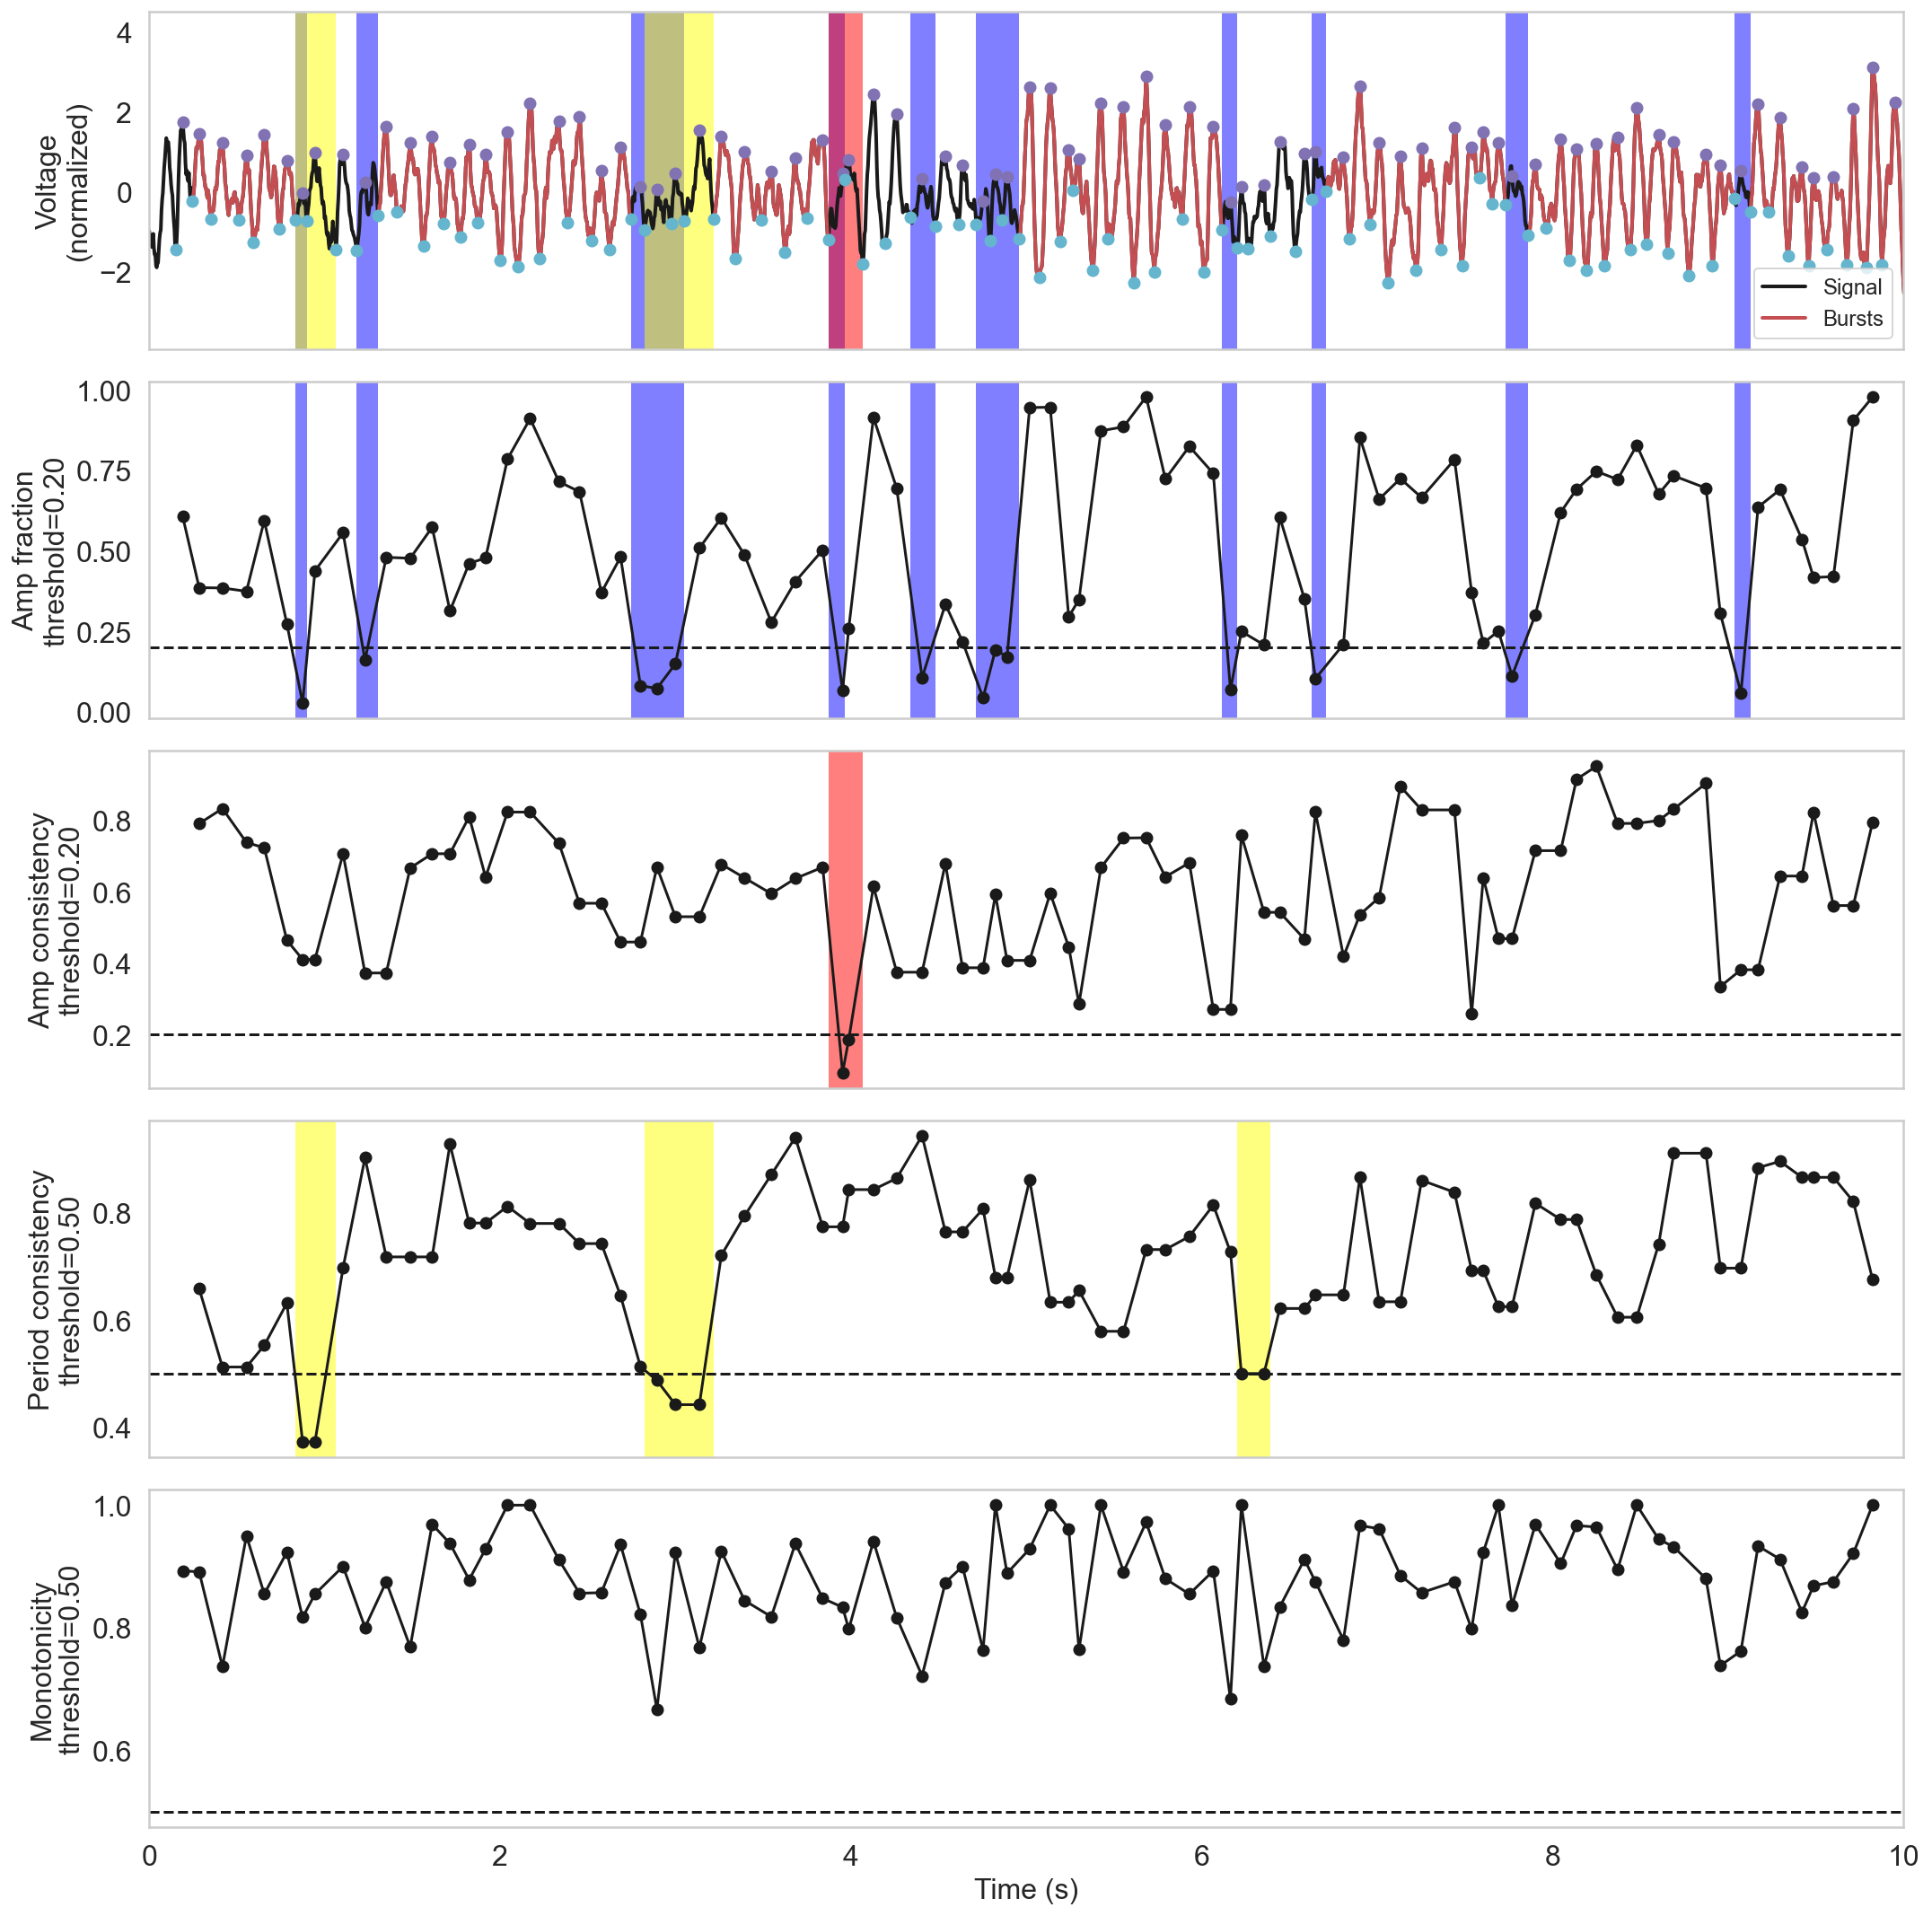

In [21]:
# get the bycycle features

f_alpha = (7, 13) # band of interest

# Tuned burst detection parameters
threshold_kwargs = {'amp_fraction_threshold': .2,
                    'amp_consistency_threshold': .2,
                    'period_consistency_threshold': .5,
                    'monotonicity_threshold': .5,
                    'min_n_cycles': 3}

df_bycycle = compute_features(pz_filt, fs, f_alpha, center_extrema='peak', threshold_kwargs=threshold_kwargs)

plot_burst_detect_summary(df_bycycle, pz_filt, fs, threshold_kwargs, xlim=(0,10))
plt.show()